**Parte 1**

In [104]:
import numpy as np
import matplotlib.pyplot as plt

In [106]:
def bias(predicted, real):
    return sum((i - j) ** 2 for i, j in zip(predicted, real)) / len(predicted)

def variance(predicted):
    average = sum(predicted) / len(predicted)
    return sum((i - average) ** 2 for i in predicted) / (len(predicted) - 1)

In [110]:
def bias_variance(function, real_x, real_y):
    prediction = [function(i) for i in real_x]
    b = bias(prediction, real_y)
    v = variance(prediction)
    return [b, v]

def adjust_polynomials(x, y, degrees_range):
    return [np.polyfit(x, y, i) for i in degrees_range]

def plot_polynomials(real_x, real_y, polynomials):
    for i in range(len(polynomials)):
        polynomial = polynomials[i]
        f = np.poly1d(polynomial)
        b, v = bias_variance(f, real_x, real_y)
        x_sample = np.linspace(np.min(real_x), np.max(real_x), 50)
        y_from_sample = f(x_sample)
        plt.figure()
        plt.plot(x, y, 'o', x_sample, y_from_sample)
        plt.title(f'Ajuste de grado {i + 2}\nBias: {b}\nVariance: {v}')

/Users/raimundoherrera/Desktop/Envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  


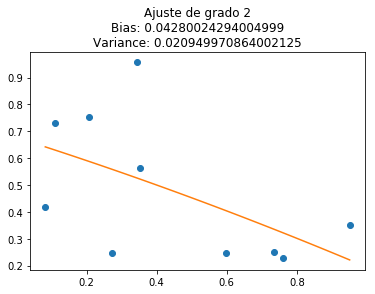

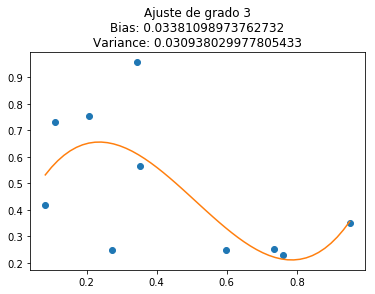

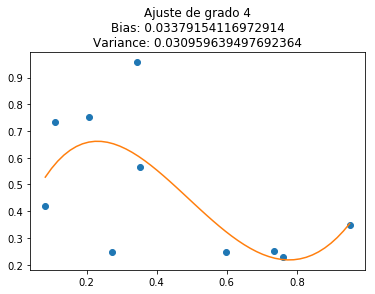

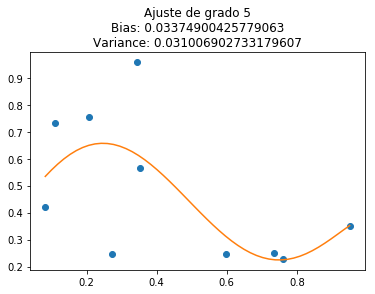

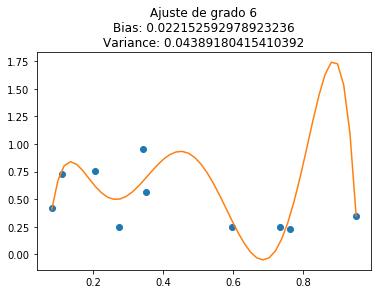

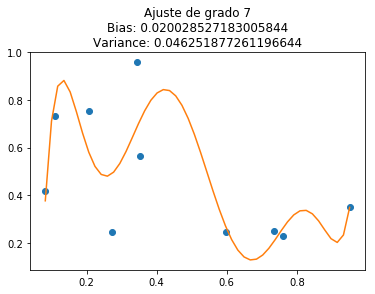

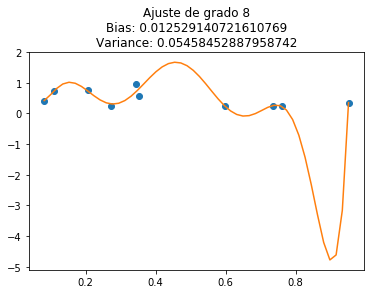

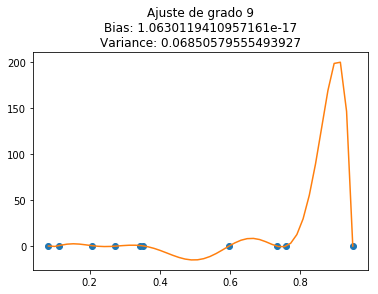

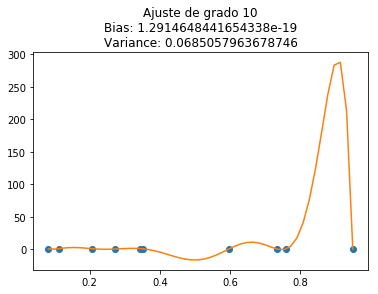

In [111]:
points = np.random.rand(10, 2)
x = points[:, 0]
y = points[:, 1]
      
polys = adjust_polynomials(x, y, range(2, 11))
plot_polynomials(x, y, polys)

Como se observa al ajustar el polinomio y subir el grado, el sesgo de nuestra predicción va aumentando, lo que concuerda con lo discutido en clases sobre que a mayor complejidad mayor sesgo, sin embargo, el cálculo de la varianza mostrado no tiene sentido real porque debería hacerse con respecto a datos nuevos.

Por otro lado, se observa que al llegar a sobre grado 9 se ajusta casi perfectamente, y esto tiene que ver con que para cada punto hay practicamente un grado, por lo que hay un overfitting excesivo. Lo que concuerda con que el sesgo es mayor porque aprendió de los datos, y probablemente al probarlo con un set nuevo no sea capaz de predecir correctamente.

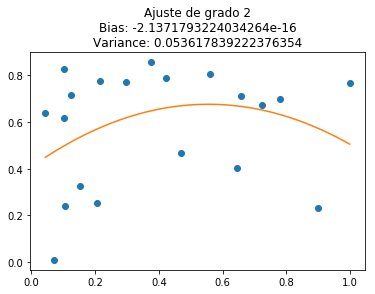

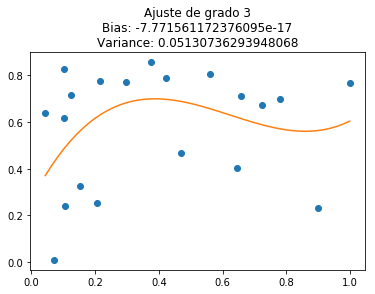

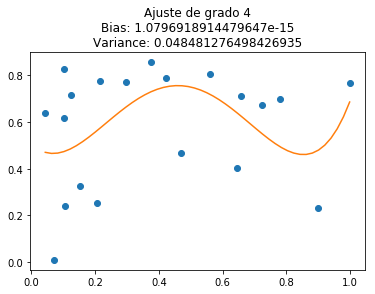

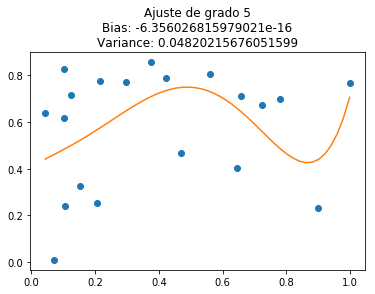

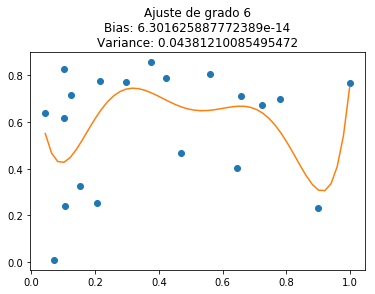

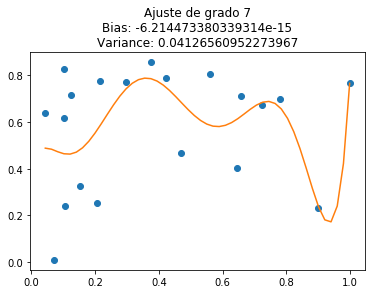

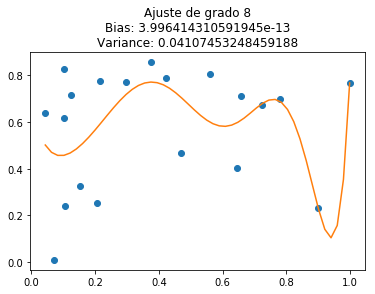

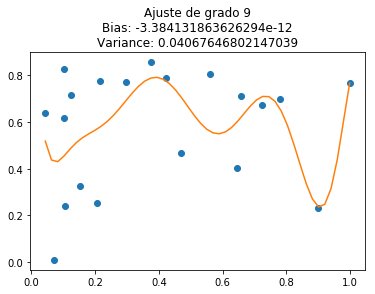

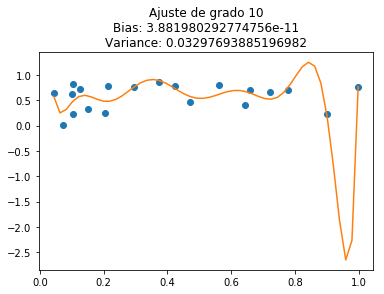

In [94]:
points = np.random.rand(20, 2)
x = points[:, 0]
y = points[:, 1]
      
polys = adjust_polynomials(x, y, range(2, 11))
plot_polynomials(x, y, polys)

Ahora se aprecia que el grado 10 no es suficiente, lo que calza con el análisis anterior, sin embargo si se alcanza a observar el sobreajuste esperado

**Parte 2**

In [96]:
import pandas as pd

In [112]:
df = pd.read_csv('planet_OGLE_Train.dat')

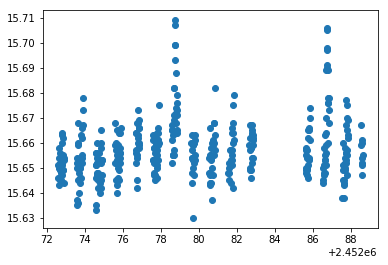

In [113]:
plt.figure()
x = df['Days']
y = df['Mag']
plt.plot(x, y, 'o')
plt.show()

/Users/raimundoherrera/Desktop/Envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  
/Users/raimundoherrera/Desktop/Envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  
/Users/raimundoherrera/Desktop/Envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  
/Users/raimundoherrera/Desktop/Envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  
/Users/raimundoherrera/Desktop/Envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  
/Users/raimundoherrera/Desktop/Envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  
/Users/raimundoherrera/Desktop/Envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  
/Users

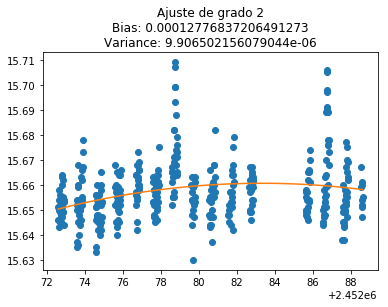

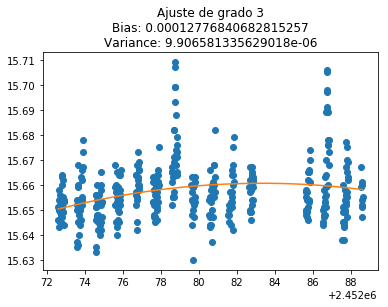

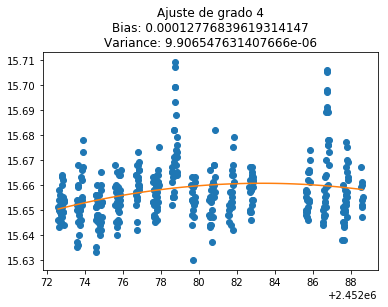

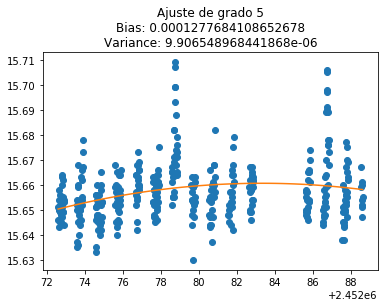

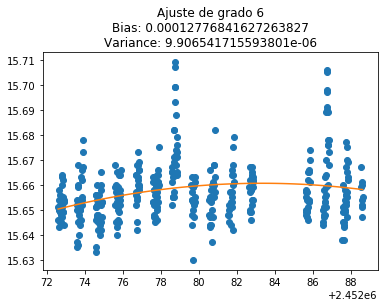

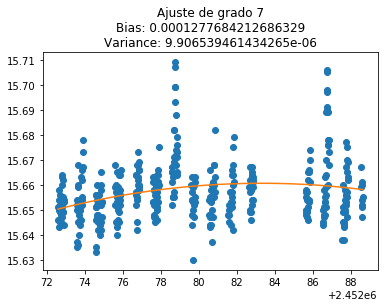

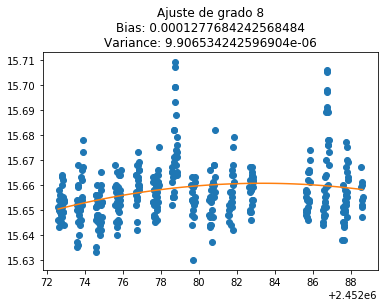

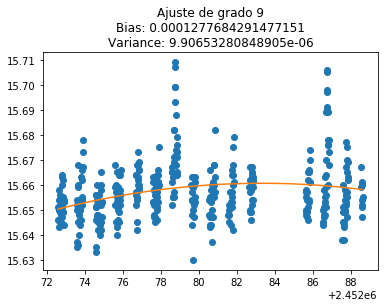

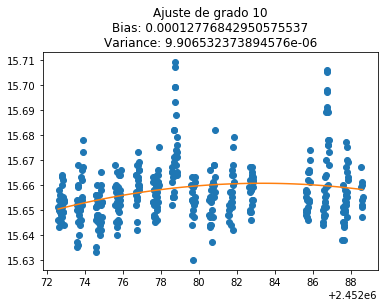

In [114]:
polynomials = adjust_polynomials(x, y, range(3, 30, 3))
plot_polynomials(x, y, polynomials)

Se ve que cambia y que el ajuste va mejorando pero no es suficiente el grado para obtener un ajuste significativo, no alcancé a probar con el test pero si con el entrenamiento no es capaz de ajustar bien, menos con el test.